In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('mushrooms.csv')
df_multinomial = pd.read_csv('penguins_lter.csv')

In [3]:
#Mushrooms dataset
df = df.drop(['veil-type', 'stalk-root'], axis=1)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

label_enc = LabelEncoder()
ordinal_columns = df.select_dtypes('object').columns
for column in ordinal_columns:
    df[column] = label_enc.fit_transform(df[column])

Y = df['class'].values
X = df.loc[:, df.columns != 'class'].values

normalized_values = StandardScaler().fit_transform(X)
X = pd.DataFrame(normalized_values, columns=df.columns[0:20])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

<Axes: >

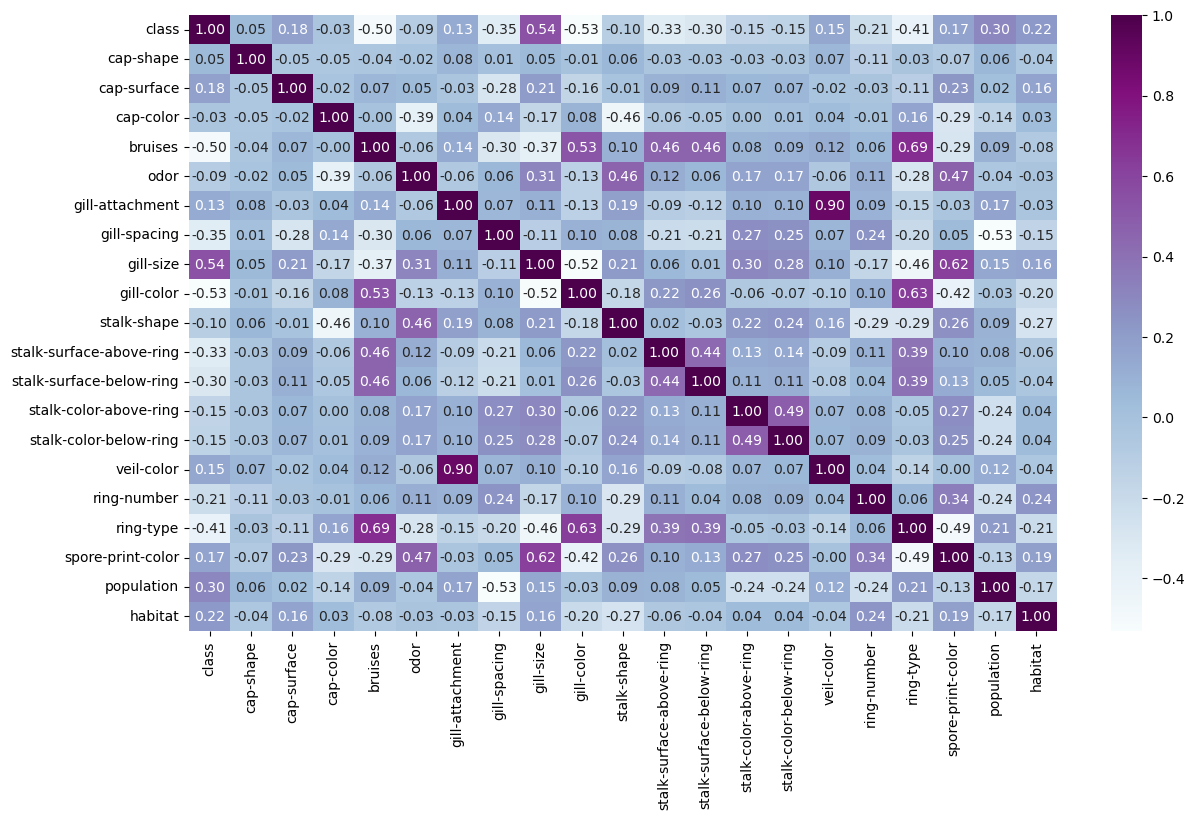

In [15]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', fmt=".2f")

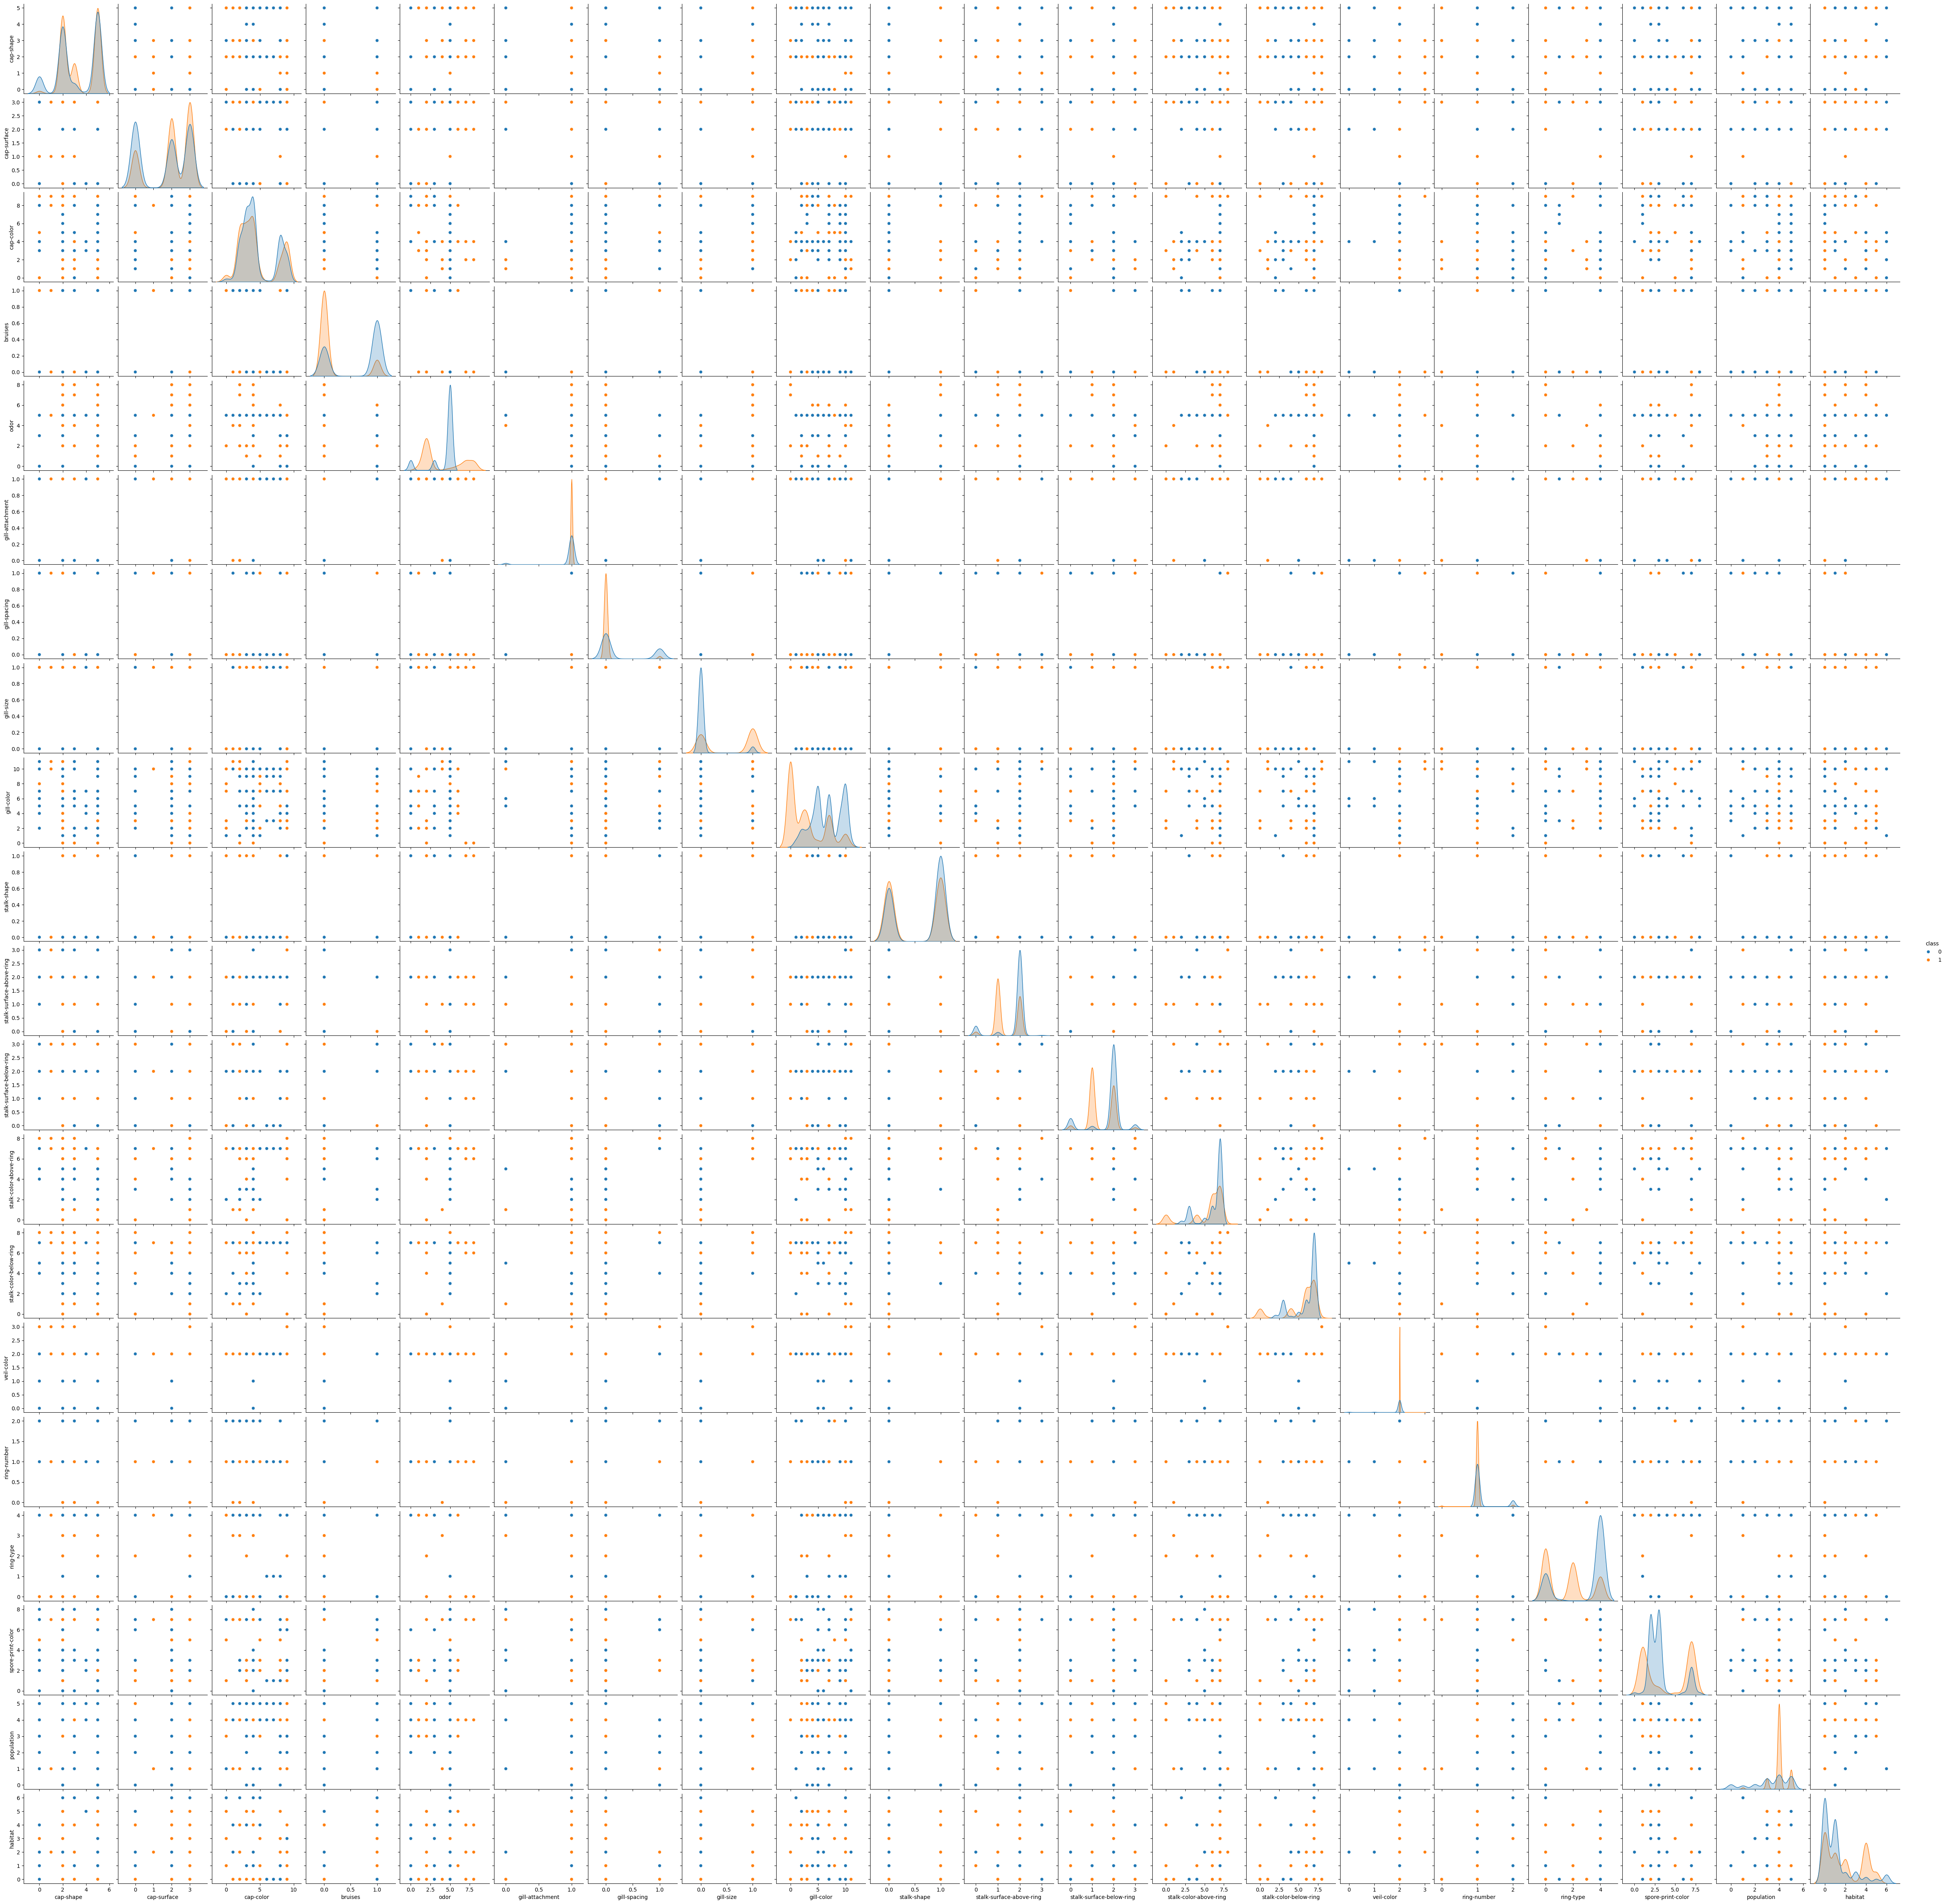

In [10]:
sns.pairplot(df, hue='class', vars=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'])

In [4]:
#Penguins dataset
df_multinomial = df_multinomial.drop(['studyName', 'Sample Number', 'Individual ID', 'Region', 'Stage', 'Comments'], axis=1)
df_multinomial.fillna(df_multinomial.mean(numeric_only=True), inplace=True)
df_multinomial.fillna(df_multinomial.mode().iloc[0], inplace=True)

ordinal_columns = df_multinomial.select_dtypes('object').columns
for column in ordinal_columns:
    df_multinomial[column] = label_enc.fit_transform(df_multinomial[column])

Y_multinomial = df_multinomial['Species'].values
X_multinomial = df_multinomial.loc[:, df_multinomial.columns != 'Species'].values

normalized_values = StandardScaler().fit_transform(X_multinomial)
X_multinomial = pd.DataFrame(normalized_values, columns=df_multinomial.columns[0:10])

X_multinomial_train, X_multinomial_test, Y_multinomial_train, Y_multinomial_test = train_test_split(X_multinomial, Y_multinomial, test_size = 0.3, random_state = 42)

In [5]:
regressor = LogisticRegression()
regressor.fit(X_train, Y_train)
print("Train accuracy is", accuracy_score(Y_train, regressor.predict(X_train))*100)

y_predict = regressor.predict(X_test)
print("Test accuracy is", accuracy_score(Y_test, y_predict)*100)

Train accuracy is 94.74147027787548
Test accuracy is 94.62674323215751


In [6]:
multinomial_regressor = LogisticRegression(solver='newton-cg')
multinomial_regressor.fit(X_multinomial_train, Y_multinomial_train)
print("Train accuracy is", accuracy_score(Y_multinomial_train, multinomial_regressor.predict(X_multinomial_train))*100)

y_multinomial_predict = multinomial_regressor.predict(X_multinomial_test)
print("Test accuracy is", accuracy_score(Y_multinomial_test, y_multinomial_predict)*100)

Train accuracy is 100.0
Test accuracy is 100.0


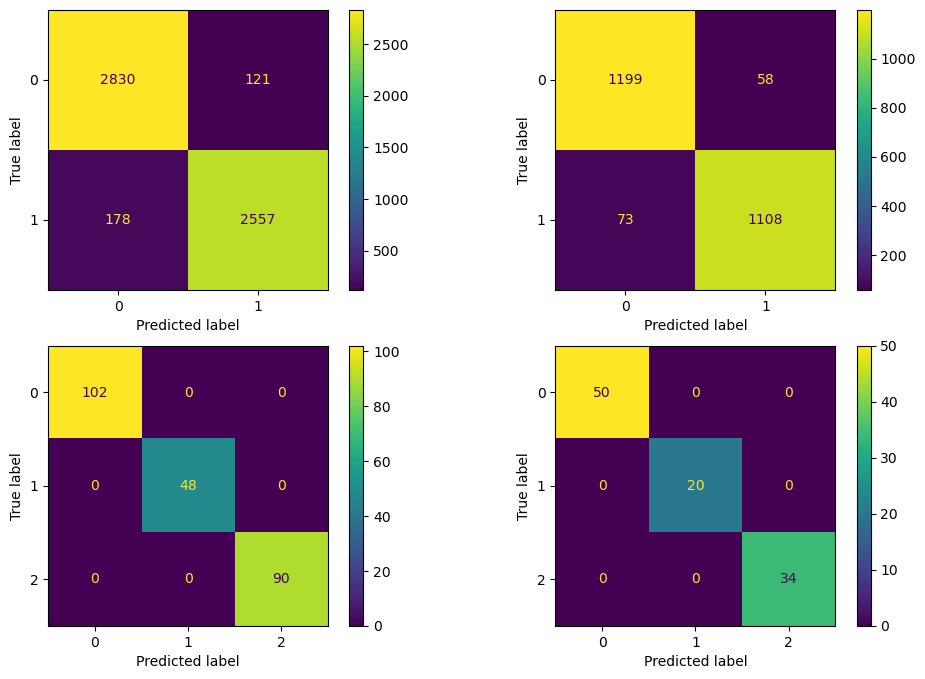

In [7]:
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize=(12, 8))

ConfusionMatrixDisplay.from_estimator(regressor, X_train, Y_train, ax=ax1)
ConfusionMatrixDisplay.from_estimator(regressor, X_test, Y_test, ax=ax2)
ConfusionMatrixDisplay.from_estimator(multinomial_regressor, X_multinomial_train, Y_multinomial_train, ax=ax3)
ConfusionMatrixDisplay.from_estimator(multinomial_regressor, X_multinomial_test, Y_multinomial_test, ax=ax4)

plt.show()

In [8]:
param_grid = {
    'penalty':['l1', 'l2', None],
    'C' : np.logspace(-3, 3, 7),
    'max_iter'  : [100, 1000, 2500, 5000],
    'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 
    }

opt_model = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring='accuracy')
opt_model.fit(X_train, Y_train)

print("Best Hyperparameters:", opt_model.best_params_)
print("Best Accuracy:", opt_model.best_score_)

d:\Programms\Anaconda\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Programms\Anaconda\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Programms\Anaconda\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Programms\Anaconda\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Programms\Anaconda\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
d:\Programms\Anaconda\envs\myenv\Lib\site-packages\sklearn\linear_model\_logisti

Best Hyperparameters: {'C': np.float64(10.0), 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Accuracy: 0.9467089572194579
